In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from combat.pycombat import pycombat
from sklearn.preprocessing import MinMaxScaler

In [32]:
# os.chdir("../Dataset/Merged")
color = ['red', 'navy', 'grey', 'yellow', 'purple', 'lime']
classiDataset = ['GSE41848', 'GSE19301', 'GSE59867', 'GSE61240', 'GSE146383', 'GSE88794']
label = ['Controllo', 'Paziente SM']
colorLabel = ['blue', 'red']

Remove batch effect / scaling

In [34]:
dataset = pd.read_csv('MergedDataset-136411.csv', index_col=0)
datasetID = dataset['SampleID'].apply(lambda x: x.split('-')[0]).values
indicator = dataset['Label']
dataset = dataset.drop(columns=['SampleID', 'Label'])

# # ## Batch removal
dataset = pycombat(dataset.transpose(), datasetID).transpose()

# # # ## Scaling
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

Found 6 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.


C:\Users\samue\AppData\Roaming\Python\Python311\site-packages\combat\pycombat.py:159: RuntimeWarning: divide by zero encountered in divide
  np.absolute(d_new-d_old)/d_old))  # maximum difference between new and old estimate


Adjusting the Data


Visualize TSNE distribuzione pazienti e sani/malati

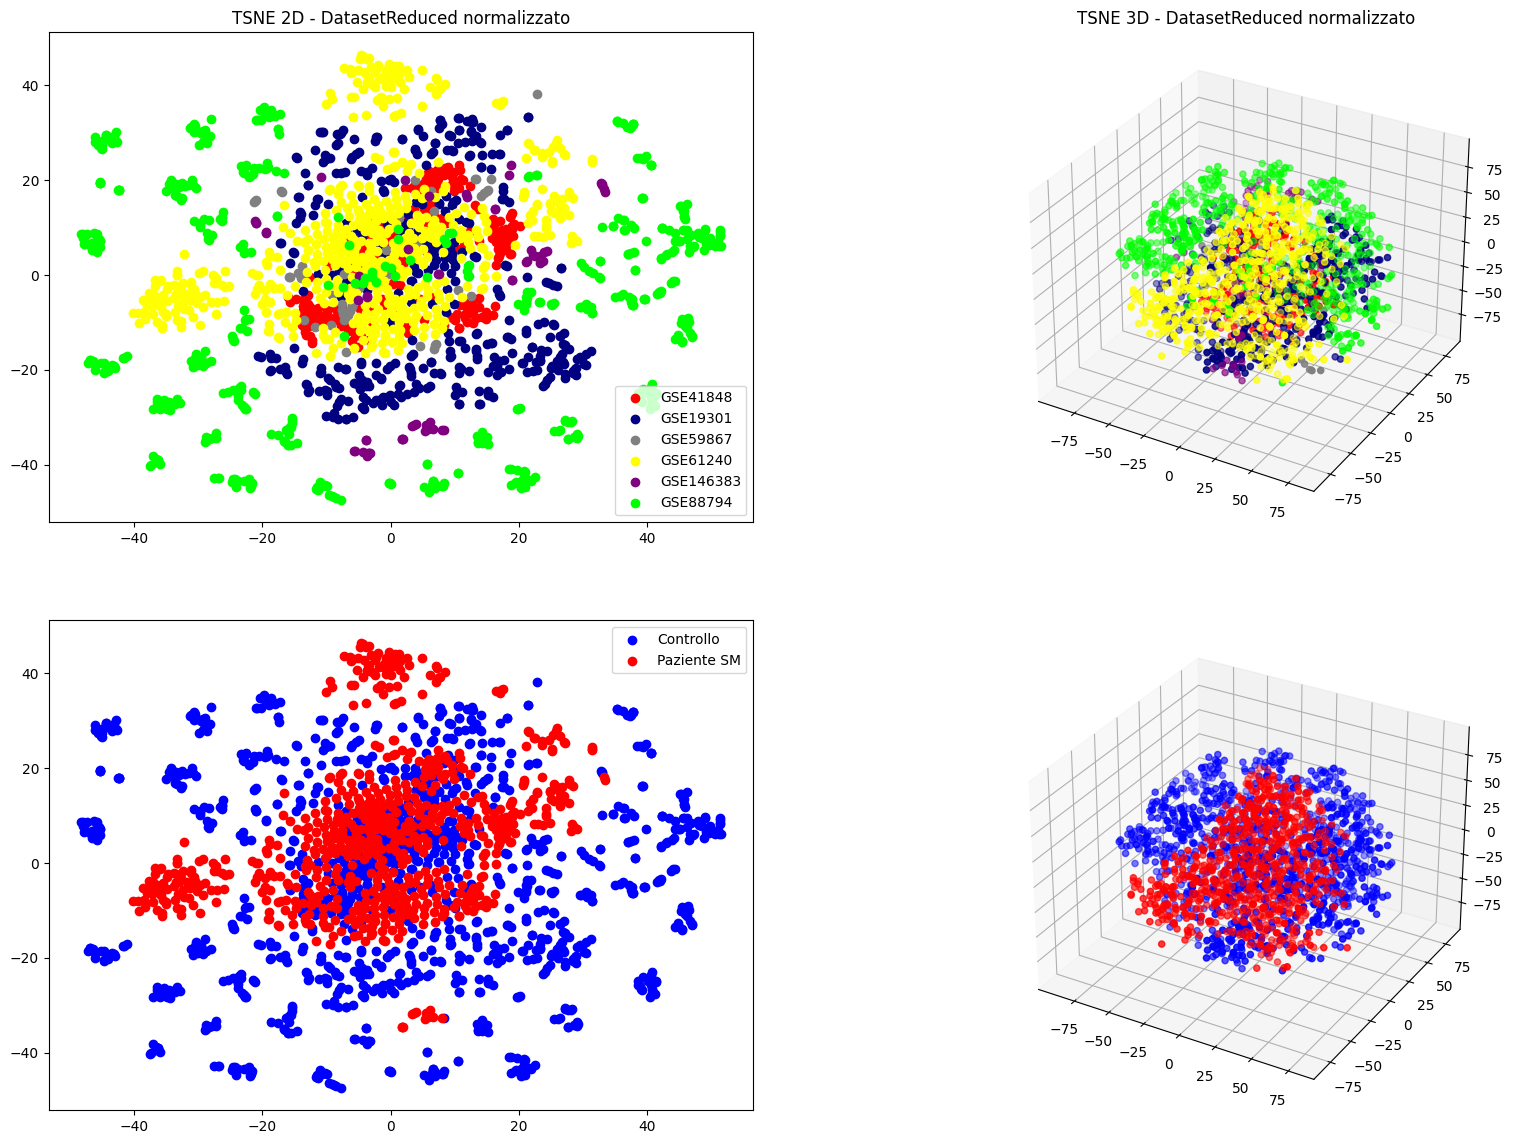

In [35]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=2000).fit_transform(dataset)
tsne3 = TSNE(n_components=3, perplexity=30, n_iter=2000).fit_transform(dataset)

fig = plt.figure(figsize=(20, 14))

plot1 = fig.add_subplot(221)
plot2 = fig.add_subplot(222, projection='3d')
plot3 = fig.add_subplot(223)
plot4 = fig.add_subplot(224, projection='3d')

for i in range(6):
    plot1.scatter(tsne[datasetID == str(i)][:, 0], tsne[datasetID == str(i)][:, 1], c=color[i], label=classiDataset[i])
    plot2.scatter(tsne3[datasetID == str(i)][:, 0], tsne3[datasetID == str(i)][:, 1], tsne3[datasetID == str(i)][:, 2], c=color[i], label=classiDataset[i])

for i in range(0, 2):
    plot3.scatter(tsne[indicator == i][:, 0], tsne[indicator == i][:, 1], c=colorLabel[i], label=label[i])
    plot4.scatter(tsne3[indicator == i][:, 0], tsne3[indicator == i][:, 1], tsne3[indicator == i][:, 2], c=colorLabel[i], label=label[i])

plot1.set_title('TSNE 2D - DatasetReduced normalizzato')
plot2.set_title('TSNE 3D - DatasetReduced normalizzato')
plot1.legend()
plot3.legend()
plt.show()

Reduce dimensionality with PCA

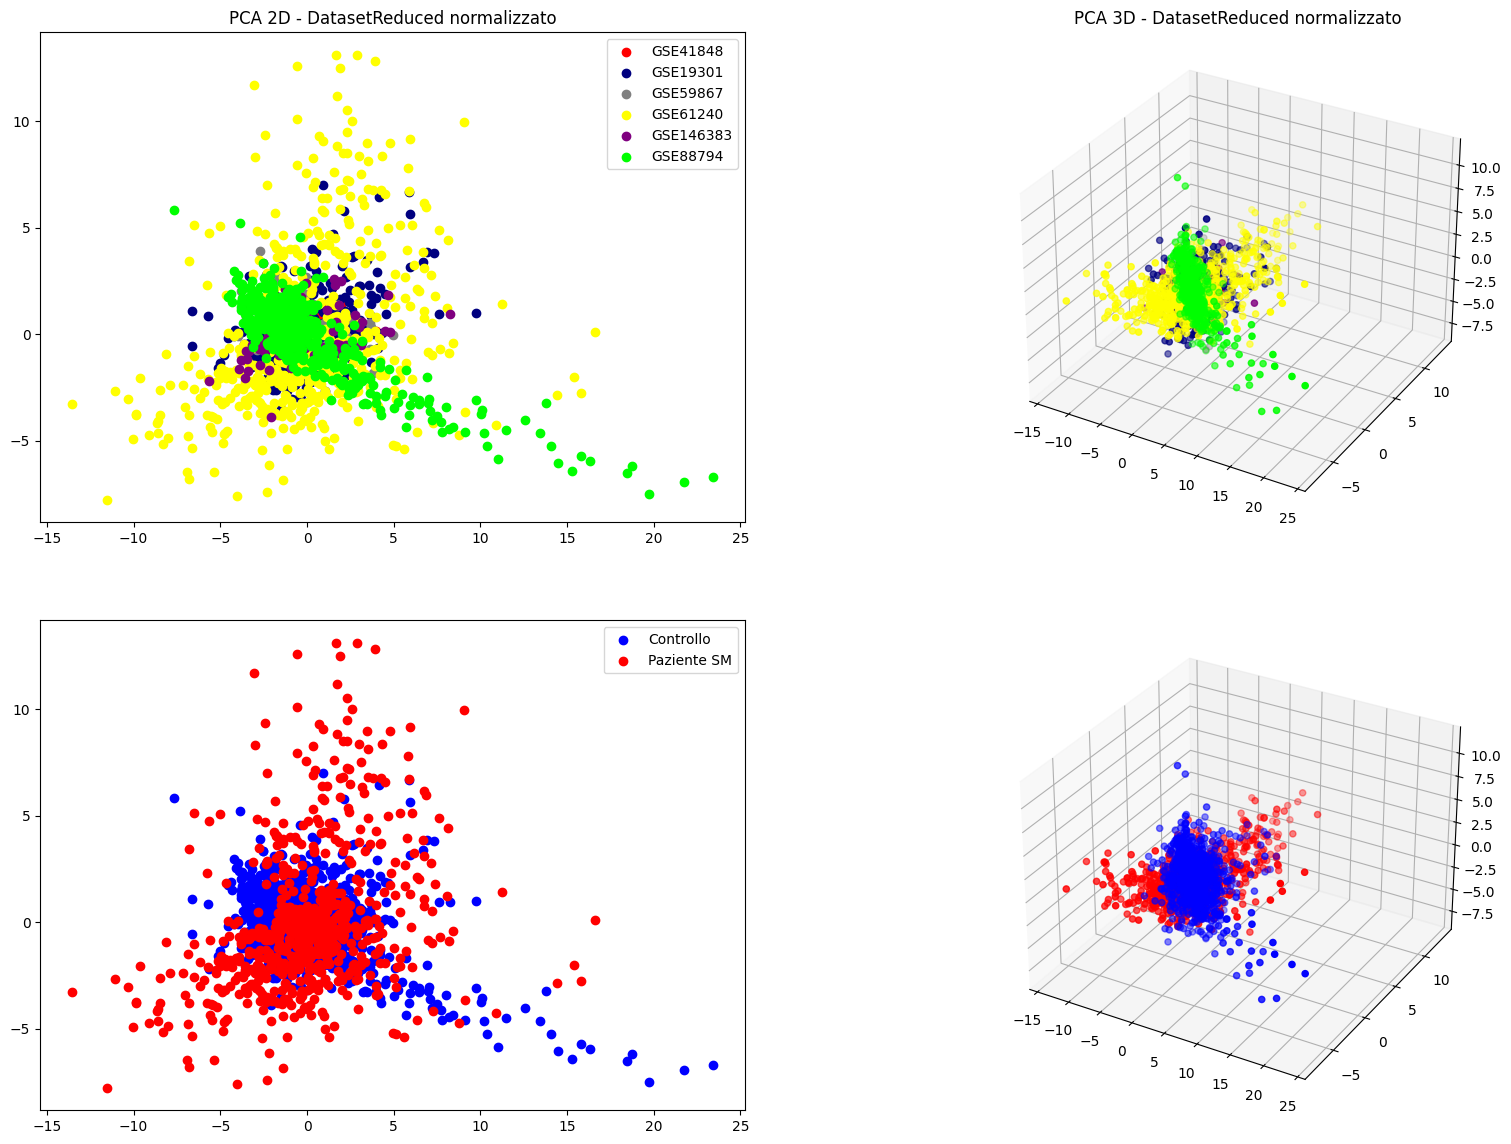

In [36]:
pca = PCA(n_components=2).fit_transform(dataset)
pca3 = PCA(n_components=3).fit_transform(dataset)

fig = plt.figure(figsize=(20, 14))

plot1 = fig.add_subplot(221)
plot2 = fig.add_subplot(222, projection='3d')
plot3 = fig.add_subplot(223)
plot4 = fig.add_subplot(224, projection='3d')

for i in range(6):
    plot1.scatter(pca[datasetID == str(i)][:, 0], pca[datasetID == str(i)][:, 1], c=color[i], label=classiDataset[i])
    plot2.scatter(pca3[datasetID == str(i)][:, 0], pca3[datasetID == str(i)][:, 1], pca3[datasetID == str(i)][:, 2], c=color[i], label=classiDataset[i])

for i in range(0, 2):
    plot3.scatter(pca[indicator == i][:, 0], pca[indicator == i][:, 1], c=colorLabel[i], label=label[i])
    plot4.scatter(pca3[indicator == i][:, 0], pca3[indicator == i][:, 1], pca3[indicator == i][:, 2], c=colorLabel[i], label=label[i])

plot1.set_title('PCA 2D - DatasetReduced normalizzato')
plot2.set_title('PCA 3D - DatasetReduced normalizzato')
plot1.legend()
plot3.legend()
plt.show()